In [1]:
import scvelo as scv
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import pickle
import functions as f
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error 


In [2]:
# import 10 fold validation with 160 predictors

linearCoefs160 = pd.read_pickle('linearCoefs160.pkl')
linearScores160 = pd.read_pickle('linearScores160.pkl')

mean_coefficients160 = linearCoefs160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients160 = linearCoefs160.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [3]:
# import 10 fold validation with 8 transcription factors

linearCoefs8 = pd.read_pickle('linearCoefs8.pkl')
linearScores8 = pd.read_pickle('linearScores8.pkl')

mean_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
std_coefficients8 = linearCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

In [187]:
thisCoefs160 = pd.read_pickle('linear160test/thisCoefs.pkl')
thisScores160 = pd.read_pickle('linear160test/thisScores.pkl')

In [188]:
# r2 value: mean is taken, so the 10 values here should correspond to taking the mean of all other values ? somehow. 
thisScores160['estimator'][0].coef_.shape


(1109, 152)

In [176]:
thisScores160['estimator'][0].coef_.flatten()


array([-0.10047422,  0.09663875, -0.04122602, ...,  0.02806091,
        0.00566086, -0.00273705], dtype=float32)

Scores are still wierd. Not sure how it calculated the r2 score etc. But I belive this is faster!!

In [142]:
np.array([x.coef_[:,0] for x in thisScores160['estimator']]).mean(axis=0)


array([-0.0983528 ,  0.16358659, -0.03075427, ..., -0.0690154 ,
       -0.1454629 ,  0.16069737], dtype=float32)

In [131]:
linearCoefs160.loc[0].groupby('target').coefficients.mean()

target
1110004E09Rik   -0.111827
1500009L16Rik    0.123010
1600014C10Rik   -0.029699
1700017B05Rik   -0.050728
1700019D03Rik   -0.101978
                   ...   
Zeb2             0.111422
Zfp36l1          0.044352
Zfp831           0.084731
Zranb3           0.000255
Zwilch           0.021672
Name: coefficients, Length: 1109, dtype: float32

In [116]:
np.array([x.coef_ for x in linearScores160['estimator'][0]]).reshape(1109,152)

array([[-0.10047423,  0.09662428, -0.04122783, ..., -0.03441157,
         0.21306013,  0.00324097],
       [ 0.1765286 , -0.13593778,  0.08274338, ...,  0.01592652,
        -0.07730852, -0.0298217 ],
       [-0.02249595,  0.02244112,  0.09050149, ...,  0.06038312,
         0.02225016,  0.01450901],
       ...,
       [-0.0602227 ,  0.10108159,  0.03400541, ...,  0.02524688,
         0.06366892,  0.0015027 ],
       [-0.14662762, -0.0680382 , -0.01713616, ..., -0.00036379,
        -0.07505181,  0.00416705],
       [ 0.16143408, -0.03586015, -0.04899916, ...,  0.02805566,
         0.00565309, -0.00273329]], dtype=float32)

In [4]:
# import 10 fold validation ridge regression with 8 tf

ridge8 = pd.read_pickle('data/ridgeRegression8.pkl')
ridgeScores8 = pd.read_pickle('data/ridgeRegressionScores8.pkl')

ridge_mean_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
ridge_std_coefficients8 = ridge8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

ridge_residuals = pd.read_pickle('data/ridgeResiduals8.pkl')

In [5]:
# import 10 fold validation lasso regression with 8 tf

lassoCoefs8 = pd.read_pickle('lasso_000013Coefs8.pkl')
lassoScores8 = pd.read_pickle('lasso_000013Scores8.pkl')

lasso_mean_coefficients8 = lassoCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.mean)
lasso_std_coefficients8 = lassoCoefs8.pivot_table(index="predictors", columns="target", values="coefficients", aggfunc = np.std)

I started off looking at the data using 8 predictors. The following shows the clustermap of the mean coefficients accross the data from the 10 fold cross validation. 

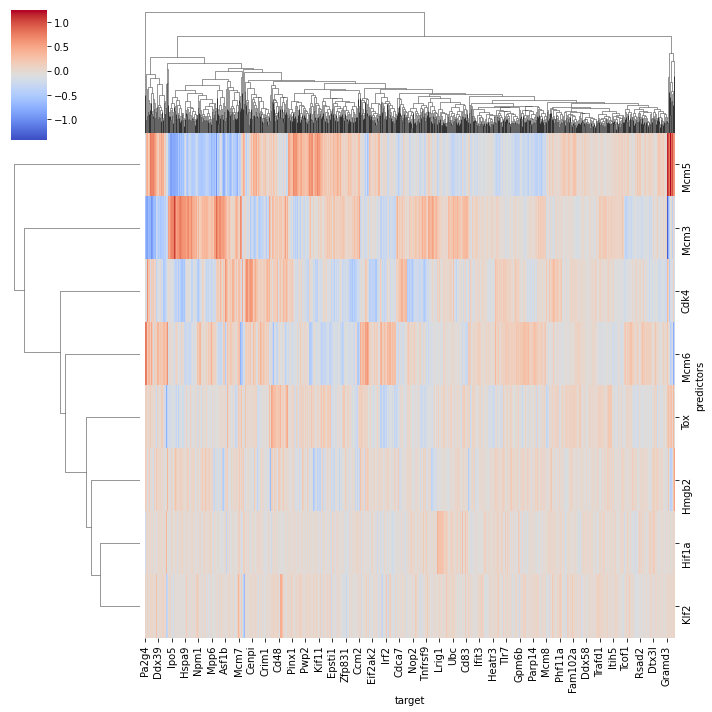

In [6]:
l = sns.clustermap(mean_coefficients8, cmap='coolwarm')

There are some patterns, so the model is not just random. The branch all the way to the right seems to be positively correlated by Mcm5 and negatively correlated by Mcm6. Also noteworthy is the dark area of inner branch in the top right. 

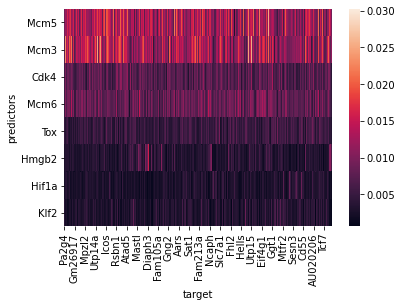

In [7]:
reordered = f.reorder_like_clustermap(std_coefficients8, l)
h = sns.heatmap(reordered)

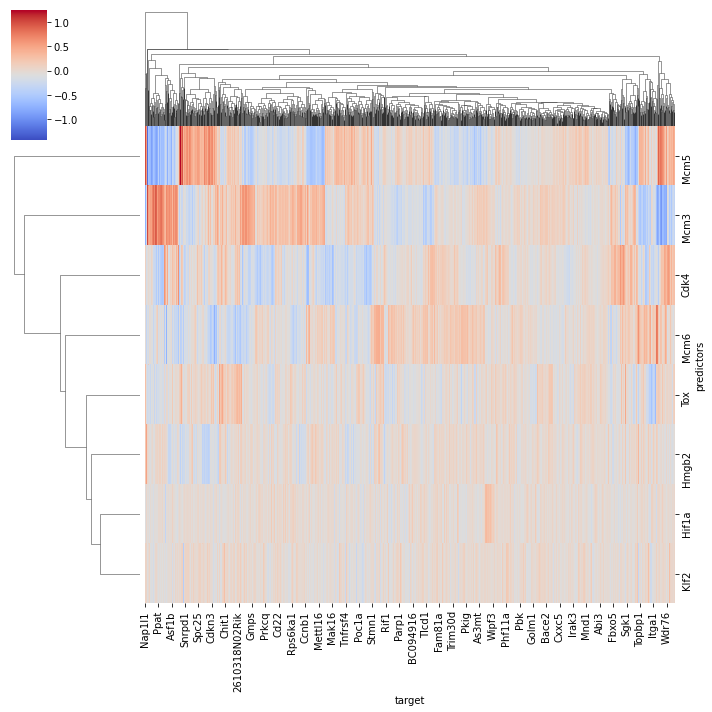

In [8]:
# ridge regression
r = sns.clustermap(ridge_mean_coefficients8, cmap='coolwarm')

<AxesSubplot:xlabel='target', ylabel='predictors'>

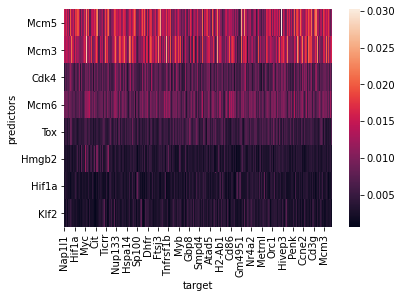

In [9]:
reordered = f.reorder_like_clustermap(ridge_std_coefficients8, r)
sns.heatmap(reordered)

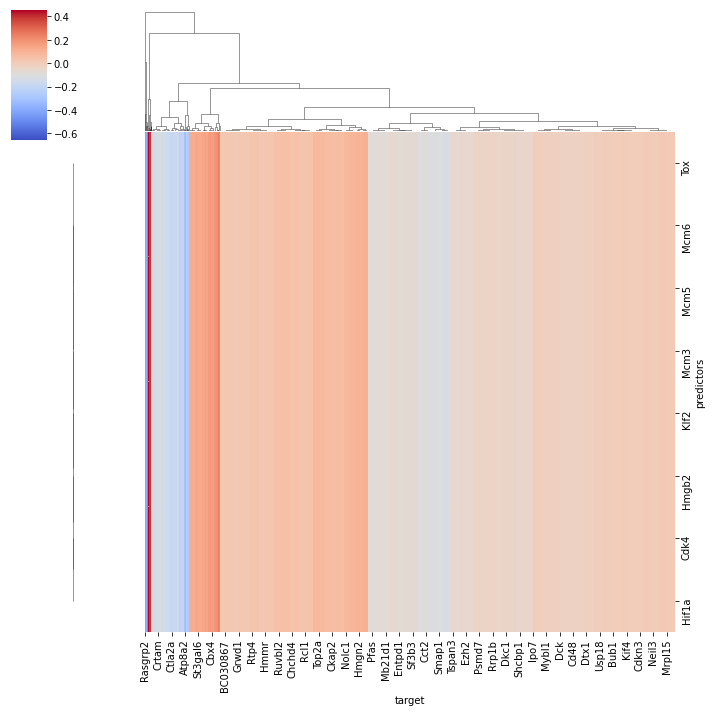

In [10]:
# lasso regression
s = sns.clustermap(lasso_mean_coefficients8, cmap='coolwarm')

I feel like something wierd might be going on here, why are the values for all the coefficients of the genes the same? 

In [11]:
lassoCoefs8

,predictors,coefficients,target
0,Klf2,0.028050,1700019D03Rik
1,Mcm3,0.028050,1700019D03Rik
2,Mcm5,0.028050,1700019D03Rik
3,Hmgb2,0.028050,1700019D03Rik
4,Cdk4,0.028050,1700019D03Rik
...,...,...,...
3,Hmgb2,-0.238108,Ankrd12
4,Cdk4,-0.238108,Ankrd12
5,Hif1a,-0.238108,Ankrd12
6,Mcm6,-0.238108,Ankrd12


<AxesSubplot:xlabel='target', ylabel='predictors'>

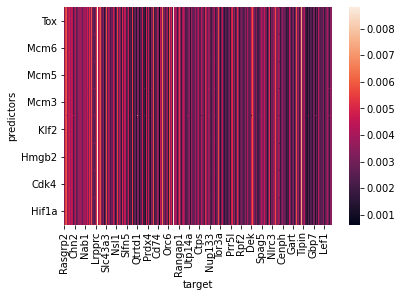

In [12]:
reo = f.reorder_like_clustermap(lasso_std_coefficients8, s)
sns.heatmap(reo)

Looking at the clustermap of all 160 predictive genes and 10 fold cross validation, it is very hard to see patterns. I believe that the predictive genes at the top show a little bit more structure but it is difficult to make any conclusions. 

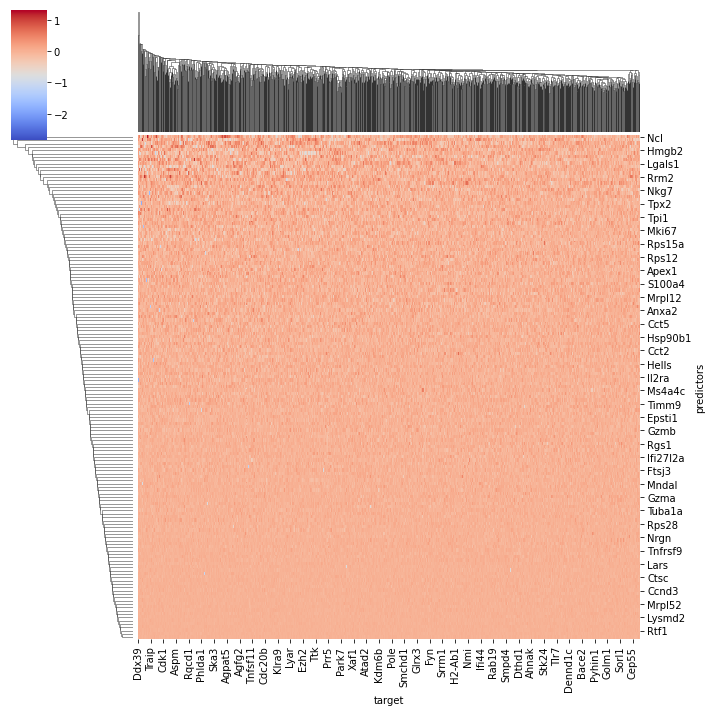

In [13]:
s = sns.clustermap(mean_coefficients160, cmap='coolwarm')

I am not sure what to make of the standard deviations. The values are incredibly high in total ? 

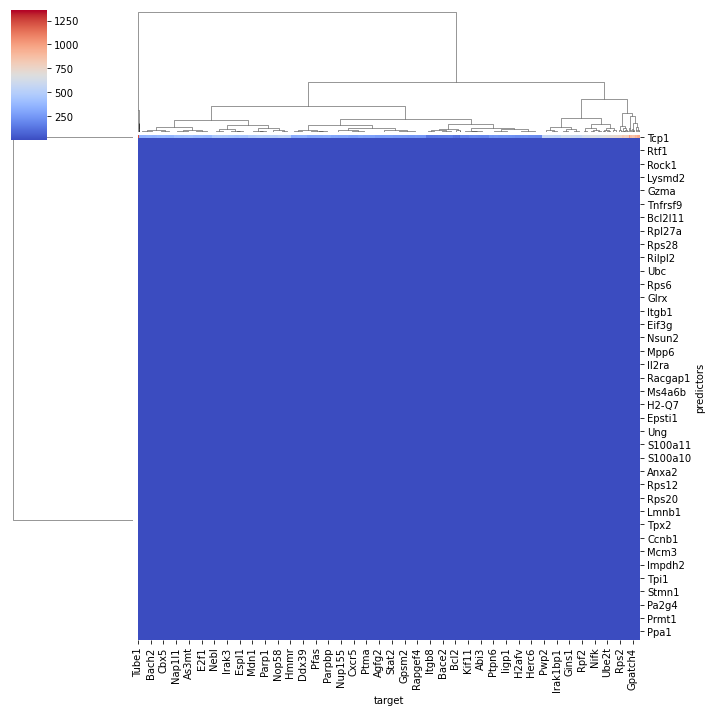

In [14]:
sns.clustermap(std_coefficients160, cmap='coolwarm')

Lets take a look at the heatmaps of proportions (sum residuals/sum absolute response values)

-> if model fits data well -> residuals closer to 0 but sum absolute response values higher -> lower score
-> if model does not fit data well -> high residuals (model can be arbitrairily bad) -> higher score

--> the lower the score the better the model fits the data

# Mean / SD (large coefficients and small SD)
#### In the following we take a look at large coefficients (large mean) that also have a smaller standard deviation. 
-> if values are large: large mean comined with small standard deviation
-> if values are small: either small mean with large stanard deviation or larger mean with very large standard deviation

## Linear w/ 8 transcription factors

<AxesSubplot:xlabel='mean/sd', ylabel='Count'>

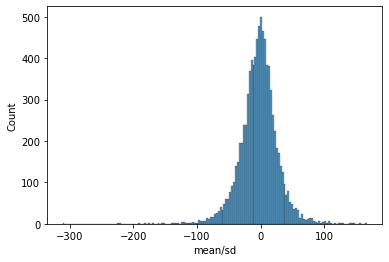

In [15]:
msl = pd.DataFrame()
msl['mean'] = linearCoefs8.groupby(['predictors', 'target']).coefficients.mean()
msl['sd'] = linearCoefs8.groupby(['predictors', 'target']).coefficients.std()
msl['mean/sd']=msl['mean']/msl['sd']
sns.histplot(msl['mean/sd'])

In [16]:
df = msl[(msl>100) | (msl<-100)].reset_index()
df['target'] = [x.upper() for x in df['target']]
df.to_csv('targets100.csv')

In [17]:
msl.nlargest(10,'mean/sd')

mean        sd     mean/sd
predictors target                                
Mcm6       Cbx5    0.589874  0.003532  166.989959
Tox        Rps2    0.509601  0.003241  157.222059
Mcm6       Malat1  0.789490  0.005339  147.863316
Hmgb2      Fxyd5   0.370194  0.002570  144.064084
Hif1a      Tox     0.369936  0.002589  142.894442
Tox        Ifngr1  0.533387  0.003818  139.703294
Mcm6       Fxyd5   0.630065  0.004888  128.899630
Cdk4       Hp1bp3  0.579395  0.004642  124.827550
           Mcm4    0.627506  0.005153  121.783330
Hif1a      Il23r   0.412802  0.003545  116.446683

In [18]:
msl.nsmallest(10, 'mean/sd')

mean        sd     mean/sd
predictors target                                  
Klf2       Rasgrp2  -0.652715  0.002098 -311.134121
Mcm6       Lsp1     -0.552358  0.002448 -225.610460
Hmgb2      Rrm1     -0.377062  0.001695 -222.492831
           Anp32e   -0.645020  0.003392 -190.146417
           Tk1      -0.304162  0.001600 -190.130146
           Ptma     -0.528115  0.002914 -181.219832
Hif1a      Hsp90ab1 -0.300973  0.001707 -176.265944
Klf2       Tox      -0.377653  0.002218 -170.235605
Tox        Tox      -0.734297  0.004613 -159.187696
Klf2       S100a6   -0.357026  0.002312 -154.453353

## Calculating z-score from coefficient values

In [19]:
# Export values for RegNet: 
# looking at x highest coefficients
# scipy.stats.norm.sf(abs(1.24))*2

# two tailed p-values with stats
# -> take coefficients / target pairs with p-value lower than eg. 0.5

# calculate z-scores from coefficient values
# (x-µ)/sd

from scipy.stats import zscore, norm


z_score_coefficients8 = linearCoefs8.groupby([ 'target','predictors']).coefficients.apply(zscore).reset_index()

p_values_coefficients8 = [norm.sf(x)*2 for l in z_score_coefficients8.coefficients for x in l]



In [20]:
sorted_linear_coefs8 = linearCoefs8.sort_values(by=['target', 'predictors']).reset_index(drop=True)

In [21]:
sorted_linear_coefs8['p_values'] = p_values_coefficients8

In [22]:
# Export values for RegNet
sorted_linear_coefs8[sorted_linear_coefs8['p_values']<0.05].to_pickle('p_values.pkl')

In [23]:
sorted_linear_coefs8.query('target=="Pdgfb" & predictors=="Hif1a" ')

,predictors,coefficients,target,p_values
59210,Hif1a,-0.103938,Pdgfb,0.526112
59211,Hif1a,-0.107283,Pdgfb,1.849413
59212,Hif1a,-0.107572,Pdgfb,1.894040
59213,Hif1a,-0.104780,Pdgfb,0.910811
59214,Hif1a,-0.105956,Pdgfb,1.462230
59215,Hif1a,-0.105267,Pdgfb,1.150330
59216,Hif1a,-0.103408,Pdgfb,0.336037
59217,Hif1a,-0.101928,Pdgfb,0.060371
59218,Hif1a,-0.104732,Pdgfb,0.887044
59219,Hif1a,-0.104749,Pdgfb,0.895238


## Export Values for GSEA

In [24]:
# Export values for GSEA

# export means
mean_coefficients8 = linearCoefs8.pivot_table(columns="predictors", index="target", values="coefficients", aggfunc = np.mean)
mean_coefficients8.index = [ix.upper() for ix in mean_coefficients8.index]
mean_coefficients8.to_csv('mean_coefficients8.csv')

In [25]:
# export medians
median_coefficients8 = linearCoefs8.pivot_table(columns="predictors", index="target", values="coefficients", aggfunc = np.median)
median_coefficients8.index = [ix.upper() for ix in median_coefficients8.index]
median_coefficients8.to_csv('median_coefficients8.csv')

In [26]:
# export mean/sd
mean_sd_coefficients8 = linearCoefs8.pivot_table(columns="predictors", index="target", values="coefficients", aggfunc = lambda x: x.mean()/x.std())
mean_sd_coefficients8.index = [ix.upper() for ix in mean_sd_coefficients8.index]
mean_sd_coefficients8.to_csv('mean_sd_coefficients8.csv')

just checking stuff...

<AxesSubplot:ylabel='Count'>

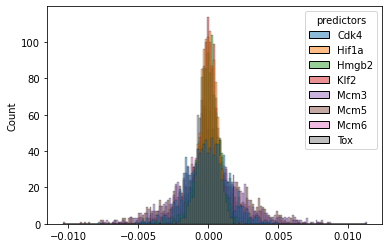

In [27]:
sns.histplot(median_coefficients8-mean_coefficients8) # think they are pretty similar. dont know why a normal distribution is what come out of subracting.. but hey. 
# i guess if its pretty normal it just means there is no general skew ?

<AxesSubplot:ylabel='Count'>

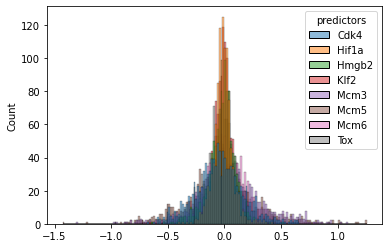

In [28]:
sns.histplot(median_coefficients8)

## Linear w/ 160 relevant genes

<AxesSubplot:xlabel='coefficients', ylabel='Count'>

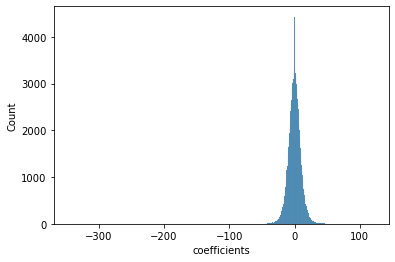

In [29]:
mean = linearCoefs160.groupby(['predictors', 'target']).coefficients.mean()
std = linearCoefs160.groupby(['predictors', 'target']).coefficients.std()
sns.histplot(mean/std)

In [30]:
msl = mean/std

In [31]:
msl.reset_index()

,predictors,target,coefficients
0,Acly,1110004E09Rik,-5.311739
1,Acly,1500009L16Rik,0.342975
2,Acly,1600014C10Rik,-8.739113
3,Acly,1700017B05Rik,-8.215066
4,Acly,1700019D03Rik,0.571315
...,...,...,...
167454,Zfp800,Zeb2,6.125445
167455,Zfp800,Zfp36l1,-13.654495
167456,Zfp800,Zfp831,-10.346279
167457,Zfp800,Zranb3,-4.551769


In [32]:
msl.nlargest(20)

predictors  target 
Tuba1b      Tacc3      120.812206
Ccl3        Ubash3b     82.670359
Nfkbia      Nr4a3       73.865018
Ccl3        Eea1        73.743824
Ifng        Il2ra       71.650727
Rrm2        Neil3       70.716322
Ccl5        Cd48        70.153202
Klf2        Klhl6       69.226702
Rgs1        Ube2t       68.392522
Tuba1b      Cenpe       67.308777
Rrm2        Cenpp       64.685468
Nfkbia      Gramd3      62.933333
Ccl3        Hspa14      62.707201
Rrm2        Diaph3      62.548693
Ubc         Vps37b      61.756311
            Gramd3      61.664165
Top2a       Skap1       61.641717
Nfkbia      Erdr1       60.516976
Hells       Gemin5      60.079811
Rplp0       Malat1      59.930181
Name: coefficients, dtype: float64

In [33]:
msl.nsmallest(20).groupby(['predictors', 'target']).mean()

predictors  target 
Adam19      Adam19    -345.963757
Bcl2l11     Bcl2l11   -148.201750
Cct2        Cct2      -119.909970
Cd160       Cd160     -117.265530
Ddx10       Ddx10     -287.531709
Ddx39       Ddx39     -197.951507
Epsti1      Epsti1    -224.472657
Gmnn        Gmnn      -117.547030
Hells       Hells     -278.171359
Hif1a       Hif1a     -213.463367
Il2ra       Il2ra     -143.193040
Itgb1       Itgb1     -127.752656
Lars        Lars      -238.015678
Nap1l1      Nap1l1    -196.805400
Racgap1     Racgap1   -125.717236
Rasgrp2     Rasgrp2   -295.568202
S100a6      S100a6    -127.726669
Selplg      Selplg    -149.716169
Tpx2        Tpx2      -123.564836
Uchl3       Uchl3     -170.387893
Name: coefficients, dtype: float64

These look very different from the model using only 8 transcription factors.

## Lasso 000013 regression

<AxesSubplot:xlabel='coefficients', ylabel='Count'>

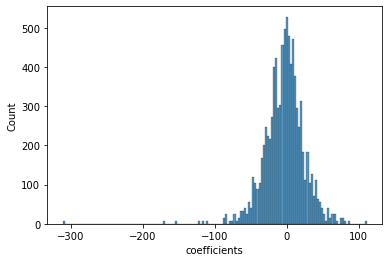

In [34]:
mean = lassoCoefs8.groupby(['predictors', 'target']).coefficients.mean()
std = lassoCoefs8.groupby(['predictors', 'target']).coefficients.std()
sns.histplot(mean/std)

In [35]:
ms = mean/std

In [36]:
ms.nlargest(10)

predictors  target
Cdk4        Sidt1     111.530347
Hif1a       Sidt1     111.530347
Hmgb2       Sidt1     111.530347
Klf2        Sidt1     111.530347
Mcm3        Sidt1     111.530347
Mcm5        Sidt1     111.530347
Mcm6        Sidt1     111.530347
Tox         Sidt1     111.530347
Cdk4        Gas7       85.958419
Hif1a       Gas7       85.958419
Name: coefficients, dtype: float64

In [37]:
ms.nsmallest(10)

predictors  target 
Cdk4        Rasgrp2   -311.128077
Hif1a       Rasgrp2   -311.128077
Hmgb2       Rasgrp2   -311.128077
Klf2        Rasgrp2   -311.128077
Mcm3        Rasgrp2   -311.128077
Mcm5        Rasgrp2   -311.128077
Mcm6        Rasgrp2   -311.128077
Tox         Rasgrp2   -311.128077
Cdk4        Tox       -170.226447
Hif1a       Tox       -170.226447
Name: coefficients, dtype: float64

# Ratio of residuals and true values
### Taking mean(log(abs(y-y_pred)/abs(y)))

if negative: y-y_pred is smaller than y, ratio is more negative the closer the prediciton to true value

if 0: y-y_pred == y -> y_pred is 0

if positive: y-y_pred > y -> residual is larger than real value, bad. 

if -inf: y-y_pred = 0 -> perfect prediction. 

## Ridge regression

<AxesSubplot:>

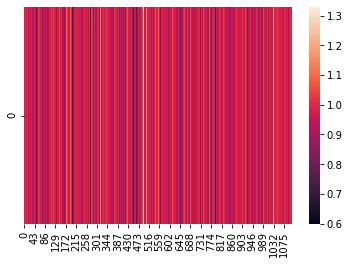

In [38]:
# ratio ridge
sns.heatmap(np.matrix(ridgeScores8.groupby('target').test_proportion.mean().tolist()))

This is the mean: 0.95653684592333


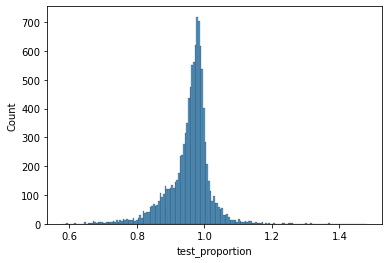

In [39]:
sns.histplot(ridgeScores8['test_proportion'])
print('This is the mean:',np.mean(ridgeScores8['test_proportion']))

In [40]:
ridgeScores8.sort_values("test_proportion")[-10:]

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
7,Ridge(),0.025190,0.019473,-0.889182,-0.990007,1.324966,1.309678,Il3
4,Ridge(),-0.006209,0.006446,-1.028299,-0.990627,1.331709,1.353322,Clec10a
2,Ridge(),0.002552,0.005940,-0.912840,-1.003346,1.348757,1.332737,Clec10a
9,Ridge(),0.001650,0.021629,-0.887418,-0.990281,1.367688,1.329708,Il3
8,Ridge(),0.006704,0.005485,-0.845267,-1.010853,1.371961,1.313973,Clec10a
8,Ridge(),0.021879,0.019687,-0.944647,-0.983904,1.372800,1.317955,Il3
5,Ridge(),0.005690,0.005613,-0.792960,-1.016667,1.377979,1.318715,Clec10a
4,Ridge(),-0.002295,0.021502,-0.699051,-1.011196,1.408626,1.329079,Il3
6,Ridge(),0.001093,0.005943,-0.633192,-1.034401,1.415417,1.332927,Clec10a
0,Ridge(),-0.030574,0.022373,-0.517237,-1.031530,1.481290,1.351833,Il3


This is the mean test_r2:  0.08972037774747547


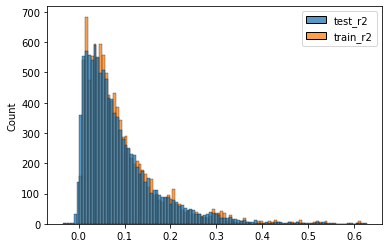

In [41]:
sns.histplot(ridgeScores8[['test_r2', 'train_r2']])
print('This is the mean test_r2: ',ridgeScores8['test_r2'].mean())

## Linear Regression 

<AxesSubplot:>

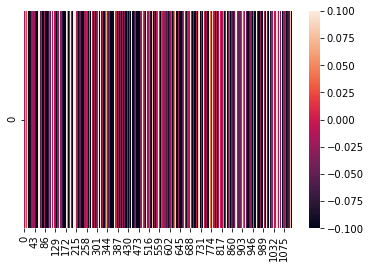

In [42]:
# proportions linear
sns.heatmap(np.matrix(linearScores8.groupby('target').test_proportion.mean().tolist()))

In [43]:
linearScores8.groupby('target').test_proportion.min()

target
1110004E09Rik    0.008739
1500009L16Rik   -0.122339
1600014C10Rik   -0.014039
1700017B05Rik   -0.058989
1700019D03Rik   -0.261897
                   ...   
Zeb2             0.026859
Zfp36l1         -0.035326
Zfp831          -0.697183
Zranb3          -0.321567
Zwilch          -0.204282
Name: test_proportion, Length: 1109, dtype: float64

In [44]:
linearLimitedScores8=linearScores8.replace(to_replace=float('-inf'), value=-1.5)

This is the mean: -0.061281746956222675
This is the median: -0.04901283420622349


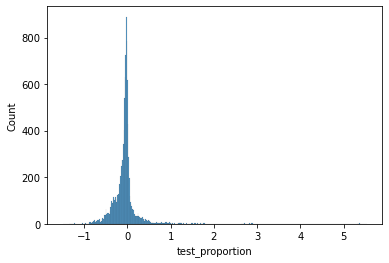

In [45]:
sns.histplot(linearLimitedScores8['test_proportion'])
print('This is the mean:',np.mean(linearLimitedScores8['test_proportion']))
print('This is the median:',np.median(linearLimitedScores8['test_proportion']))

In [46]:
linearLimitedScores8.sort_values(by='test_proportion')

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
2,LinearRegression(),0.054085,0.077019,-0.814279,-0.937095,-1.500000,-0.437587,Itgb8
8,LinearRegression(),0.201004,0.164851,-0.732594,-0.842757,-1.322527,-1.252058,Lrr1
5,LinearRegression(),0.159970,0.169168,-0.904876,-0.823636,-1.319287,-1.289192,Lrr1
1,LinearRegression(),0.140349,0.171360,-0.909282,-0.823247,-1.299095,-1.284687,Lrr1
2,LinearRegression(),0.204771,0.163858,-0.811591,-0.834049,-1.278404,-1.285287,Lrr1
...,...,...,...,...,...,...,...,...
6,LinearRegression(),0.059239,0.046605,-0.893211,-0.958667,5.361015,5.380674,Atp1b1
9,LinearRegression(),0.058624,0.046552,-0.926057,-0.955077,5.401692,5.374567,Atp1b1
0,LinearRegression(),0.048611,0.047533,-1.130607,-0.932357,5.461558,5.362782,Atp1b1
5,LinearRegression(),0.046712,0.047879,-1.217414,-0.922728,5.491284,5.364778,Atp1b1


In [47]:
t = linearLimitedScores8[linearLimitedScores8['test_proportion']<=-0.5]['target'].drop_duplicates().tolist()

In [48]:
df = pd.DataFrame()
df['target'] = [x.upper() for x in t]
df.to_csv('targetsRatio-05.csv')

One value with -inf. The next smallest value is at -1.2.
At least the mean is below 0, jsut barely..

## Linear w/ 160 relevant genes

<AxesSubplot:>

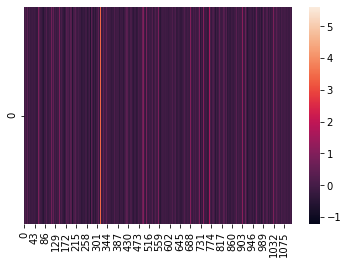

In [49]:
# residuals linear
sns.heatmap(np.matrix(linearScores160.groupby('target').test_proportion.mean().tolist()))

In [50]:
linearScores160.groupby('target').test_proportion.min()

target
1110004E09Rik   -0.027145
1500009L16Rik   -0.184990
1600014C10Rik   -0.012138
1700017B05Rik   -0.146089
1700019D03Rik   -0.102632
                   ...   
Zeb2             0.037263
Zfp36l1         -0.096294
Zfp831          -0.698130
Zranb3          -0.322789
Zwilch          -0.159464
Name: test_proportion, Length: 1109, dtype: float64

In [51]:
linearLimitedScores160=linearScores160.replace(to_replace=float('-inf'), value=-1.5)

This is the mean: -0.04533269694255149
This is the median: -0.10715003684163094


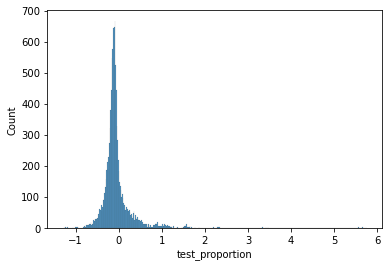

In [52]:
sns.histplot(linearLimitedScores160['test_proportion'])
print('This is the mean:',np.mean(linearLimitedScores160['test_proportion']))
print('This is the median:',np.median(linearLimitedScores160['test_proportion']))

In [53]:
linearLimitedScores160.sort_values(by='test_proportion')

,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error,test_proportion,train_proportion,target
9,LinearRegression(),0.899769,0.897017,-0.101772,-0.102789,-1.301290,-1.245686,Rasgrp2
1,LinearRegression(),0.906936,0.896277,-0.093425,-0.103670,-1.278983,-1.240495,Rasgrp2
5,LinearRegression(),0.893734,0.897678,-0.107618,-0.102153,-1.242641,-1.244114,Rasgrp2
3,LinearRegression(),0.894362,0.897635,-0.109928,-0.101892,-1.240340,-1.243445,Rasgrp2
6,LinearRegression(),0.900084,0.896997,-0.106947,-0.102188,-1.226363,-1.247110,Rasgrp2
...,...,...,...,...,...,...,...,...
7,LinearRegression(),0.277112,0.300206,-0.566914,-0.716314,5.605303,5.615865,Atp1b1
9,LinearRegression(),0.265960,0.302075,-0.722095,-0.699118,5.648858,5.595056,Atp1b1
0,LinearRegression(),0.410554,0.282937,-0.700483,-0.701923,5.663877,5.585166,Atp1b1
1,LinearRegression(),0.256006,0.302788,-0.724610,-0.699166,5.721543,5.592919,Atp1b1


No value with -inf, so no values that match.

This is the mean test_r2:  0.2604853127081715


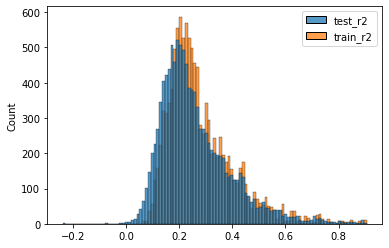

In [54]:
sns.histplot(linearScores160[['test_r2', 'train_r2']])
print('This is the mean test_r2: ',linearScores160['test_r2'].mean())

## Lasso alpha = 0.000013
This does not work since I have not been able to generate the data. The kernel keeps getting killed. 

<AxesSubplot:>

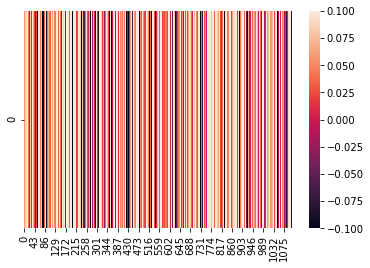

In [55]:
# residuals ridge
sns.heatmap(np.matrix(lassoScores8.groupby('target').test_proportion.mean().tolist()))

In [56]:
lassoLimitedScores8=lassoScores8.replace(to_replace=float('-inf'), value=-1.5)

This is the mean: 0.08091878241452197
This is the median: 0.05693427473306656


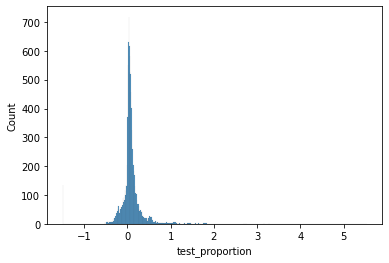

In [57]:
sns.histplot(lassoLimitedScores8['test_proportion'])
print('This is the mean:',np.mean(lassoLimitedScores8['test_proportion']))
print('This is the median:',np.median(lassoLimitedScores8['test_proportion']))

This is the mean test_r2:  0.08972004242263536


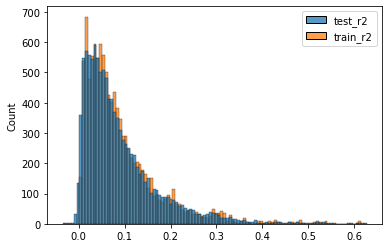

In [58]:
sns.histplot(lassoScores8[['test_r2', 'train_r2']])
print('This is the mean test_r2: ',lassoScores8['test_r2'].mean())

This is the mean test_r2:  0.08972037774747547


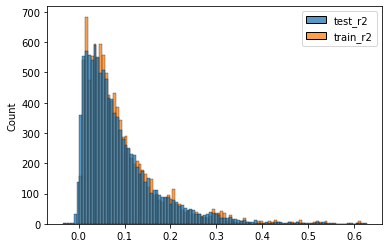

In [59]:
sns.histplot(ridgeScores8[['test_r2', 'train_r2']])
print('This is the mean test_r2: ',ridgeScores8['test_r2'].mean())

Why are these the same? exactly the same. something is not working here. 
this is why I need a pipeline. 

# Residuals

In [60]:
# Load dataset with velocity values
vdata = sc.read_h5ad("velocity_adata.h5ad")

In [61]:
# Scale Ms and velocity layer with zero mean and unit variance 
    # sc.pp.scale adds most recent mean and std as variables to var

sc.pp.scale(vdata, layer='Ms')
sc.pp.scale(vdata, layer='velocity')

In [62]:
# Velocity genes
# No Ccl5 included..

velocity_genes = vdata.var.index[vdata.var['velocity_genes'] == True].tolist()

transcription8 = ['Klf2', 'Mcm3', 'Mcm5', 'Hmgb2', 'Cdk4', 'Hif1a', 'Mcm6', 'Tox']

X = vdata[:, transcription8].layers['Ms']

In [63]:
# genes with smaller proportion

genes = linearLimitedScores8[linearLimitedScores8['test_proportion']<-0.8]['target'].drop_duplicates().tolist()

In [64]:
genes

['Adarb1',
 'Pask',
 'Stil',
 'Cdc20b',
 'Lrr1',
 'Map1b',
 'Kntc1',
 'Itgb8',
 'Rad51ap1',
 'Mtfr2',
 'Spire1',
 'Polq',
 'Cenpi']

In [65]:
type(linearLimitedScores8)

pandas.core.frame.DataFrame